In [62]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()

In [63]:
tickers = ["PERSISTENT.NS","TATAELXSI.NS","APLAPOLLO.NS","KPRMILL.NS","HCLTECH.NS","TANLA.NS"]

In [64]:
data = pd.DataFrame()

data = yf.download(tickers,period="4y")
     
data = data['Adj Close']
#data.to_csv("//Users//sjacob//stocks//prices.csv")

[*********************100%***********************]  6 of 6 completed


In [65]:
#data = data.dropna()
data.dropna(inplace=True)

In [66]:
data

,APLAPOLLO.NS,HCLTECH.NS,KPRMILL.NS,PERSISTENT.NS,TANLA.NS,TATAELXSI.NS
Date,,,,,,
2019-03-18,137.433350,456.847412,114.663506,627.707092,36.389057,924.205444
2019-03-19,135.614594,467.194885,115.036545,617.688232,35.899956,927.546753
2019-03-20,138.591644,467.983948,112.533195,609.625305,36.437965,928.770447
2019-03-22,137.906540,462.077484,109.882576,601.848816,35.948864,922.699402
2019-03-25,140.149185,458.831238,107.261414,605.570129,34.237011,900.533142
...,...,...,...,...,...,...
2023-03-10,1199.150024,1116.300049,575.650024,4749.399902,634.349976,6249.299805
2023-03-13,1186.750000,1098.599976,576.750000,4622.049805,620.000000,6130.950195
2023-03-14,1193.599976,1084.050049,581.049988,4533.100098,608.799988,6062.500000


[*********************100%***********************]  6 of 6 completed


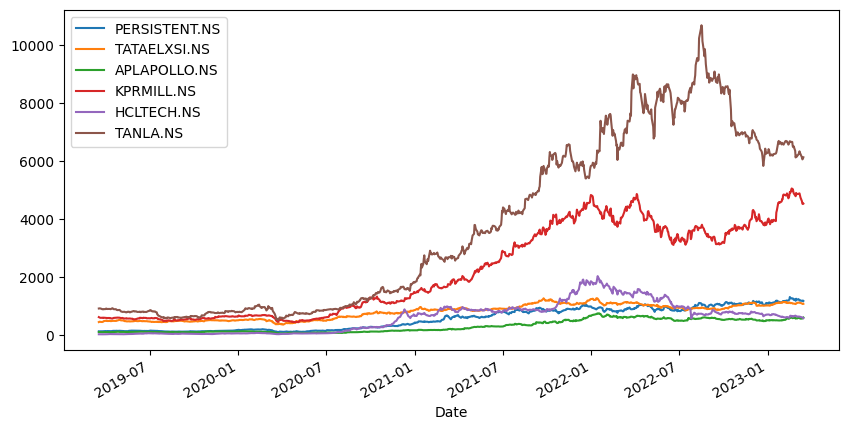

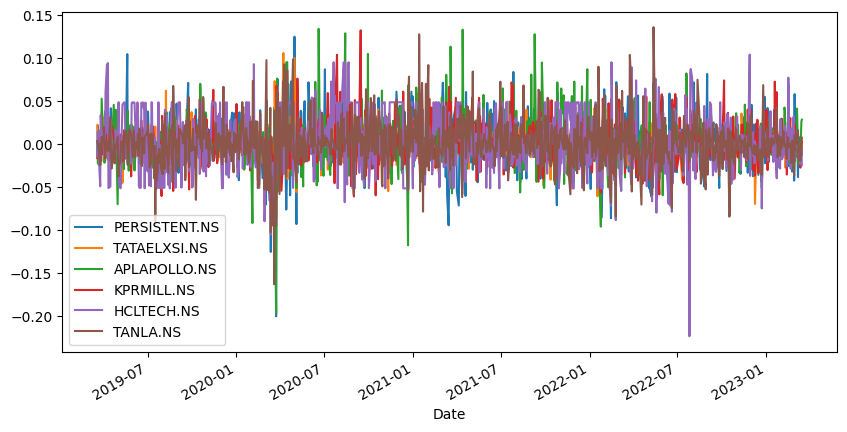

PERSISTENT.NS    0.548657
TATAELXSI.NS     0.220636
APLAPOLLO.NS     0.427557
KPRMILL.NS       0.504029
HCLTECH.NS       0.709844
TANLA.NS         0.482297
dtype: float64
               PERSISTENT.NS  TATAELXSI.NS  APLAPOLLO.NS  KPRMILL.NS  \
PERSISTENT.NS       0.188070      0.030979      0.042859    0.031621   
TATAELXSI.NS        0.030979      0.083960      0.030878    0.044919   
APLAPOLLO.NS        0.042859      0.030878      0.182340    0.030636   
KPRMILL.NS          0.031621      0.044919      0.030636    0.137086   
HCLTECH.NS          0.050178      0.021790      0.042592    0.046538   
TANLA.NS            0.049452      0.038560      0.039952    0.044419   

               HCLTECH.NS  TANLA.NS  
PERSISTENT.NS    0.050178  0.049452  
TATAELXSI.NS     0.021790  0.038560  
APLAPOLLO.NS     0.042592  0.039952  
KPRMILL.NS       0.046538  0.044419  
HCLTECH.NS       0.307075  0.038162  
TANLA.NS         0.038162  0.179743  
Expected portfolio return: 0.49836210212400633
Expected va

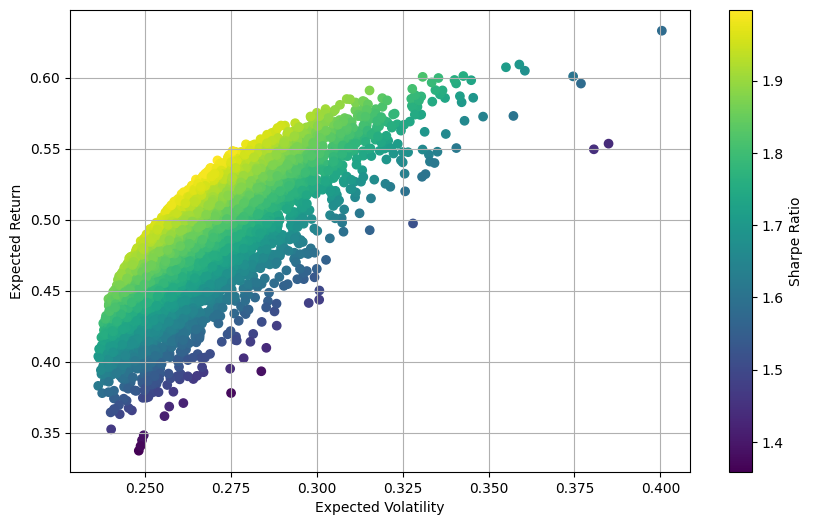

Optimal weights: [0.219 0.    0.135 0.298 0.192 0.156]
Expected return, volatility and Sharpe ratio: [0.53960497 0.26938541 2.00309647]


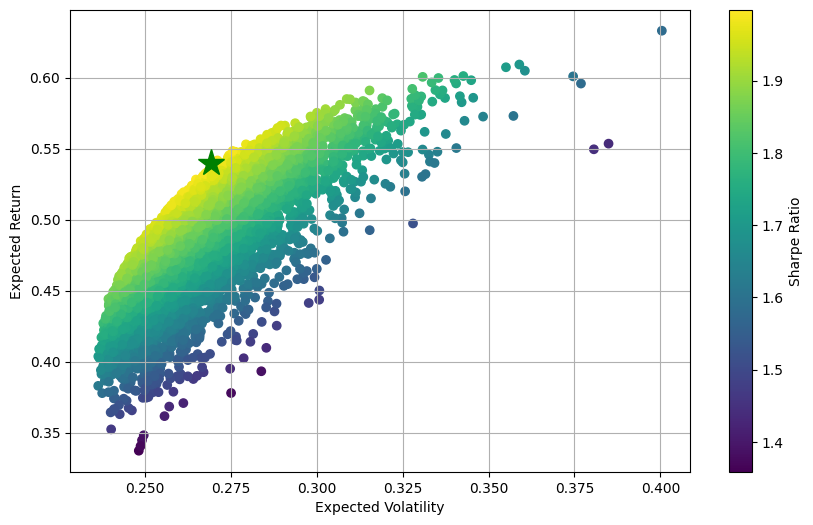

In [67]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as optimization

#these are the stocks we can choose in our portfolio
stocks = tickers


#downloading the data from Yahoo! Finance
def download_data(stocks):
    data = yf.download(tickers,period="4y")['Adj Close']
    data.columns = stocks
    return data

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

#we usually use natural logarithm for normalization purposes
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns;

def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))
    plt.show()

#print out mean and covariance of stocks within [start_date, end_date]. There are 252 trading days within a year
def show_statistics(returns):
    print(returns.mean()*252)
    print(returns.cov()*252)

#weights defines what stocks to include (with what portion) in the portfolio
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    return weights;

#expected portfolio return
def calculate_portfolio_return(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print("Expected portfolio return:", portfolio_return)

#expected portfolio variance
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    print("Expected variance:", portfolio_variance)

def generate_portfolios(weights, returns):
    preturns = []
    pvariances = []

 #Monte-Carlo simulation: we generate several random weights -> so random portfolios !!!
    for i in range(10000):
        weights = np.random.random(len(stocks))
        weights/=np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))

    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns,pvariances

def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

# OK this is the result of the simulation ... we have to find the optimal portfolio with 
# some optimization technique !!! scipy can optimize functions (minimum/maximum finding)
def statistics(weights, returns):
    portfolio_return=np.sum(returns.mean()*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

# [2] means that we want to maximize according to the Sharpe-ration
# note: maximizing f(x) function is the same as minimizing -f(x) !!!
def	min_func_sharpe(weights,returns):
    return -statistics(weights,returns)[2] 

# what are the constraints? The sum of weights = 1 !!!  f(x)=0 this is the function to minimize
def optimize_portfolio(weights,returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) #the sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stocks))) #the weights can be 1 at most: 1 when 100% of money is invested into a single stock
    optimum=optimization.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints) 
    return optimum

# optimal portfolio according to weights: 0 means no shares of that given company 
def print_optimal_portfolio(optimum, returns):
    print("Optimal weights:", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio:", statistics(optimum['x'].round(3),returns))

def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.show()

if __name__ == "__main__":
    data = download_data(stocks)
    show_data(data)
    returns = calculate_returns(data)
    plot_daily_returns(returns)
    show_statistics(returns)
    weights=initialize_weights()
    calculate_portfolio_return(returns,weights)
    calculate_portfolio_variance(returns,weights)
    preturns,pvariances=generate_portfolios(weights, returns)
    plot_portfolios(preturns,pvariances)
    optimum=optimize_portfolio(weights,returns)
    print_optimal_portfolio(optimum, returns)
    show_optimal_portfolio(optimum, returns, preturns, pvariances)


# Gentic Algorithm

In [68]:
import pandas as pd
import numpy as np
from deap import algorithms, base, creator, tools

In [69]:
df = data
def evaluate_portfolio(weights, df):
    returns = np.log(df / df.shift(1))
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    fitness = portfolio_return / portfolio_std
    return fitness,

n_assets = len(df.columns)

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: np.random.uniform(0, 1, n_assets))
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', evaluate_portfolio, df=df)
toolbox.register('mate', tools.cxBlend, alpha=0.5)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register('select', tools.selTournament, tournsize=3)


NGEN = 50
POP_SIZE = 100

pop = toolbox.population(n=POP_SIZE)

for gen in range(NGEN):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))
    top = tools.selBest(pop, k=1)
    print('Generation:', gen+1, ' Best fitness:', top[0].fitness.values[0])

weights = tools.selBest(pop, k=1)[0]
print('Optimal weights:', weights)

Generation: 1  Best fitness: 1.9760436964045036
Generation: 2  Best fitness: 1.9801062812541321
Generation: 3  Best fitness: 1.9866539802151915
Generation: 4  Best fitness: 1.9945053130420083
Generation: 5  Best fitness: 1.988769177737927
Generation: 6  Best fitness: 1.9920700399926254
Generation: 7  Best fitness: 1.9958089984824712
Generation: 8  Best fitness: 1.9958089984824712
Generation: 9  Best fitness: 1.9983018158797095
Generation: 10  Best fitness: 1.9983018158797095
Generation: 11  Best fitness: 1.9983018158797095
Generation: 12  Best fitness: 2.0017979219242883
Generation: 13  Best fitness: 2.0017979219242883
Generation: 14  Best fitness: 2.003149969072186
Generation: 15  Best fitness: 2.003149969072186
Generation: 16  Best fitness: 2.004793896126684
Generation: 17  Best fitness: 2.004793896126684
Generation: 18  Best fitness: 2.0063206585109037
Generation: 19  Best fitness: 2.0063206585109037
Generation: 20  Best fitness: 2.0068297869574745
Generation: 21  Best fitness: 2.00

In [70]:
returns = np.log(data / data.shift(1))
ann_returns = returns.mean() * 252 * 100
ann_returns

PERSISTENT.NS    54.865707
TATAELXSI.NS     22.063559
APLAPOLLO.NS     42.755740
KPRMILL.NS       50.402877
HCLTECH.NS       70.984362
TANLA.NS         48.229662
dtype: float64

In [71]:
np.sum(weights * ann_returns)

Individual(197.29935967)

In [72]:
np.sum(weights * returns.mean()) * 252*100

Individual(197.29935967)

In [73]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 252, weights)))*100

98.2436093305911

In [74]:
returns.cov() *252

,PERSISTENT.NS,TATAELXSI.NS,APLAPOLLO.NS,KPRMILL.NS,HCLTECH.NS,TANLA.NS
PERSISTENT.NS,0.188070,0.030979,0.042859,0.031621,0.050178,0.049452
TATAELXSI.NS,0.030979,0.083960,0.030878,0.044919,0.021790,0.038560
APLAPOLLO.NS,0.042859,0.030878,0.182340,0.030636,0.042592,0.039952
KPRMILL.NS,0.031621,0.044919,0.030636,0.137086,0.046538,0.044419
HCLTECH.NS,0.050178,0.021790,0.042592,0.046538,0.307075,0.038162
TANLA.NS,0.049452,0.038560,0.039952,0.044419,0.038162,0.179743


Text(0, 0.5, 'Expected Return')

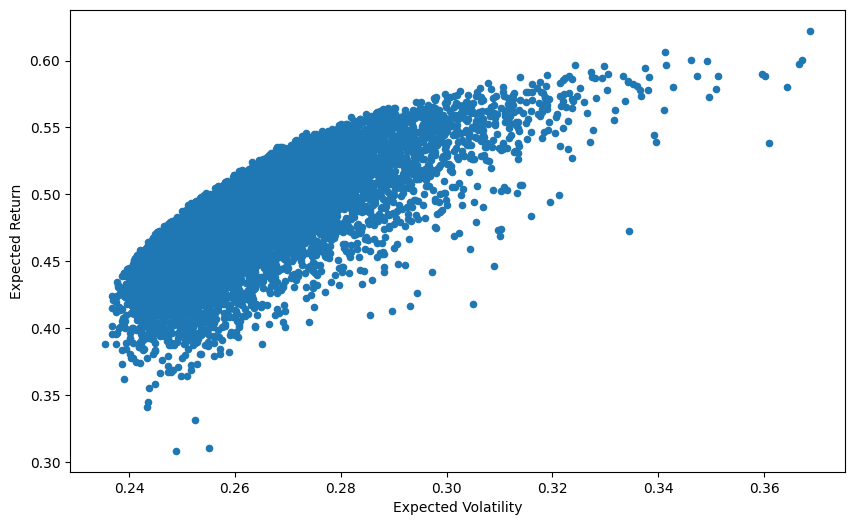

In [75]:
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
#pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [76]:
df = pd.DataFrame(data=wts)
df.columns = tickers
df_col_merged = pd.concat([portfolios, df], axis=1)
dft = df_col_merged.loc[df_col_merged['Volatility'].argmin()]
dft*100

Return           38.841683
Volatility       23.549704
PERSISTENT.NS    11.439968
TATAELXSI.NS     42.303631
APLAPOLLO.NS     11.708072
KPRMILL.NS       17.022983
HCLTECH.NS        5.242942
TANLA.NS         12.282404
Name: 2464, dtype: float64

In [77]:
dft = df_col_merged.loc[df_col_merged['Return'].argmax()]

In [79]:
dft*100

Return           62.234615
Volatility       36.863704
PERSISTENT.NS    20.202401
TATAELXSI.NS      1.164315
APLAPOLLO.NS      2.562681
KPRMILL.NS       14.042460
HCLTECH.NS       56.270020
TANLA.NS          5.758122
Name: 9771, dtype: float64

# The code defines a class called GeneticAlgorithm which is used to implement a simple genetic algorithm to optimize portfolio weights based on the given fitness function. The class has four methods:

__init__(self, population_size, mutation_rate, fit_func, data, portfolio): This is the constructor method that initializes the GeneticAlgorithm object with the given population_size, mutation_rate, fit_func, data, and portfolio (number of assets) values. The fit_func argument is a fitness function that takes two arguments: an individual (portfolio weights) and the data (prices of assets).
_generate_initial_population(self, population_size): This method generates an initial population of size population_size, where each individual has self.portfolio number of weights (i.e., portfolio size). Each weight is assigned a random value between 0 and 1, and the weights are then normalized so that they sum to 1.
_select_next_generation(self, population): This method selects the top self.population_size individuals from the given population based on their fitness scores. The fitness scores for each individual are calculated using the given fit_func. The method returns a list of the selected individuals.
_mutate_population(self, population, mutation_rate): This method applies a mutation to the given population by randomly changing each weight with probability mutation_rate. The mutated weights are then normalized so that they sum to 1. The method returns the mutated population.
run(self, generations): This method runs the genetic algorithm for the given number of generations. It first generates an initial population using _generate_initial_population() method. Then, for each generation, it selects the top individuals from the current population using _select_next_generation() method, applies mutation using _mutate_population() method, and then evaluates the fitness scores of the new population. Finally, the method returns the individual with the highest fitness score (i.e., the best portfolio weights) and its fitness score.

In [80]:
import numpy as np
import pandas as pd
from typing import List

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, fit_func, data,num_assets):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.fit_func = fit_func
        self.data = data
        self.portfolio = num_assets
    
    def run(self, generations):
        population = self._generate_initial_population(self.population_size)
        
        for gen in range(generations):
            # Select next generation
            population = self._select_next_generation(population)
            # Apply mutation to the next generation
            population = self._mutate_population(population, self.mutation_rate)
            
        # Calculate fitness scores for final population
        fitness_scores = [self.fit_func(p, self.data) for p in population]
        # Return the individual with the highest fitness score
        best_individual = population[np.argmax(fitness_scores)]
        return best_individual, np.max(fitness_scores)
    
    def _generate_initial_population(self, population_size):
        population = []
        for i in range(population_size):
            # Generate random individual with 4 weights
            individual = np.random.rand(self.portfolio) # The number of portfolio
            # Normalize the weights so they sum to 1
            individual /= individual.sum()
            population.append(individual)
        return population
    
    def _select_next_generation(self, population):
        # Select top population_size individuals for next generation
        fitness_scores = [self.fit_func(p, self.data) for p in population]
        idx = np.argsort(fitness_scores)[::-1][:self.population_size]
        return [population[i] for i in idx]
    
    def _mutate_population(self, population, mutation_rate):
        for i, individual in enumerate(population):
            # Apply mutation to each weight
            for j in range(len(individual)):
                if np.random.rand() < mutation_rate:
                    individual[j] = np.random.rand()
            # Normalize the weights so they sum to 1
            individual /= individual.sum()
            population[i] = individual
        return population

def portfolio_fitness(weights: List[float], df: pd.DataFrame) -> float:
    # Calculate portfolio returns
    portfolio_returns = np.sum(df.pct_change() * weights, axis=1)
    # Calculate portfolio mean return
    portfolio_mean_return = np.mean(portfolio_returns)
    # Calculate portfolio standard deviation
    portfolio_std_dev = np.std(portfolio_returns)
    # Calculate fitness score as negative Sharpe ratio
    sharpe_ratio = portfolio_mean_return / portfolio_std_dev
    fitness_score = -sharpe_ratio
    return fitness_score

def genetic_portfolio_optimization(df,num_assets,population_size=100, generations=200, mutation_rate=0.05):
    # Initialize genetic algorithm optimizer

    ga = GeneticAlgorithm(population_size, mutation_rate, portfolio_fitness, df,num_assets)
    # Optimize portfolio weights
    result = ga.run(generations)
    # Return optimal weights and fitness score
    return result

# Load data
df = data #pd.read_csv('portfolio_data.csv', index_col='Date')
# Run genetic portfolio optimization
num_assets = 6
weights, fitness_score = genetic_portfolio_optimization(df,num_assets)
# Print results
print("Optimal portfolio weights:", weights)
print("Fitness score (negative Sharpe ratio):", fitness_score)

Optimal portfolio weights: [0.00186372 0.63067635 0.08865955 0.03387958 0.10752995 0.13739085]
Fitness score (negative Sharpe ratio): -0.10324949637878585


In [81]:
weights.sum()

1.0

In [82]:
d = {}
j= 0
for i in data.columns:
    d[i]= weights[j]*100
    j=j+1

In [83]:
d

{'PERSISTENT.NS': 0.18637215839691484,
 'TATAELXSI.NS': 63.06763460807395,
 'APLAPOLLO.NS': 8.865955468065126,
 'KPRMILL.NS': 3.387958069311481,
 'HCLTECH.NS': 10.752994818126048,
 'TANLA.NS': 13.739084878026475}

In [84]:
returns = np.log(data / data.shift(1))
ann_returns = returns.mean() * 252 * 100
ann_returns

PERSISTENT.NS    54.865707
TATAELXSI.NS     22.063559
APLAPOLLO.NS     42.755740
KPRMILL.NS       50.402877
HCLTECH.NS       70.984362
TANLA.NS         48.229662
dtype: float64

In [85]:
np.sum(weights * ann_returns)

33.77481118283204

In [86]:
np.sum(weights * returns.mean()) * 252*100

33.774811182832025

In [87]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 252, weights)))*100

24.68327529590532

# Ant Colony Optimisation

In [89]:
import numpy as np
import pandas as pd

class AntColonyOptimization:
    def __init__(self, n_ants, n_iterations, n_assets, Q, rho, alpha, beta, data):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.n_assets = n_assets
        self.Q = Q
        self.rho = rho
        self.alpha = alpha
        self.beta = beta
        self.data = data
        self.tau = np.ones((self.n_assets, self.n_assets))
        
    def run(self):
        best_portfolio = None
        best_fitness = -np.inf
        
        for i in range(self.n_iterations):
            ant_portfolios = self._generate_ant_portfolios()
            ant_fitness_scores = [self._evaluate_portfolio(p) for p in ant_portfolios]
            
            # Update pheromone levels
            delta_tau = np.zeros((self.n_assets, self.n_assets))
            for j, p in enumerate(ant_portfolios):
                fitness = ant_fitness_scores[j]
                for k in range(self.n_assets):
                    for l in range(self.n_assets):
                        delta_tau[k,l] += self.Q * fitness * p[k] * p[l]
            self.tau = (1 - self.rho) * self.tau + delta_tau
            
            # Update best portfolio
            idx = np.argmax(ant_fitness_scores)
            if ant_fitness_scores[idx] > best_fitness:
                best_fitness = ant_fitness_scores[idx]
                best_portfolio = ant_portfolios[idx]
                
        return best_portfolio, best_fitness
    
    def _generate_ant_portfolios(self):
        portfolios = []
        for i in range(self.n_ants):
            portfolio = np.zeros(self.n_assets)
            for j in range(self.n_assets):
                p = self.tau[j] ** self.alpha * (1.0 / self.data.iloc[-1,j]) ** self.beta
                p /= np.sum(p)
                asset = np.random.choice(self.n_assets, p=p)
                portfolio[asset] += 1
            portfolios.append(portfolio / np.sum(portfolio))
        return portfolios
    
    def _evaluate_portfolio(self, portfolio):
        returns = np.log(self.data / self.data.shift(1))
        annualized_return = np.sum(portfolio * returns.mean() * 252)
        covariance_matrix = returns.cov() * 252
        portfolio_variance = np.dot(portfolio, np.dot(covariance_matrix, portfolio))
        annualized_std_dev = np.sqrt(portfolio_variance)
        sharpe_ratio = annualized_return / annualized_std_dev
        return sharpe_ratio

In [92]:
# Create example data frame
df = data
# Run ant colony optimization
aco = AntColonyOptimization(n_ants=10, n_iterations=100, n_assets=6, Q=1, rho=0.5, alpha=1, beta=2, data=df)
weights, sharpe_ratio = aco.run()

# Print the results
print("Optimal Weights:", weights)
print("Sharpe Ratio:", sharpe_ratio)

Optimal Weights: [0.16666667 0.         0.16666667 0.33333333 0.16666667 0.16666667]
Sharpe Ratio: 1.99117196381745


In [97]:
d = {}
j= 0
for i in data.columns:
    d[i]= weights[j]*100
    j=j+1

In [98]:
d

{'PERSISTENT.NS': 16.666666666666664,
 'TATAELXSI.NS': 0.0,
 'APLAPOLLO.NS': 16.666666666666664,
 'KPRMILL.NS': 33.33333333333333,
 'HCLTECH.NS': 16.666666666666664,
 'TANLA.NS': 16.666666666666664}

In [99]:
np.sum(weights * returns.mean()) * 252*100

52.94020446359431

In [100]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 252, weights)))*100

26.587459760179627

# Particle Swarm Optimisation

In [104]:
import numpy as np
import pandas as pd
import random

# Define particle class
class Particle:
    def __init__(self, n_assets):
        self.position = np.array([random.uniform(0, 1) for _ in range(n_assets)])
        self.velocity = np.zeros(n_assets)
        self.best_position = self.position.copy()
        self.fitness = 0
        self.best_fitness = 0

# Define particle swarm optimization class
class ParticleSwarmOptimization:
    def __init__(self, n_particles, n_iterations, n_assets, w=0.7, c1=2, c2=2, data=None):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.n_assets = n_assets
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.data = data
        self.particles = [Particle(n_assets) for _ in range(n_particles)]
        self.global_best_position = np.zeros(n_assets)
        self.global_best_fitness = 0
        
    def _fitness(self, weights):
        weights_sum = np.sum(weights)
        if weights_sum > 1:
            return -1 # Return negative value to ensure this particle is not selected
        weights = weights / weights_sum # Ensure the sum of weights equals 1
        portfolio_returns = (self.data.pct_change().mean() * weights).sum() * 252
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(self.data.pct_change().cov() * 252, weights)))
        return portfolio_returns / portfolio_std
    
    def optimize(self):
        for i in range(self.n_iterations):
            for particle in self.particles:
                # Evaluate fitness of particle
                particle.fitness = self._fitness(particle.position)
                
                # Update best position and fitness of particle
                if particle.fitness > particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = particle.fitness
                
                # Update global best position and fitness
                if particle.fitness > self.global_best_fitness:
                    self.global_best_position = particle.position.copy()
                    self.global_best_fitness = particle.fitness
            
            # Update velocity and position of each particle
            for particle in self.particles:
                r1 = random.uniform(0, 1)
                r2 = random.uniform(0, 1)
                particle.velocity = (self.w * particle.velocity
                                     + self.c1 * r1 * (particle.best_position - particle.position)
                                     + self.c2 * r2 * (self.global_best_position - particle.position))
                particle.position = particle.position + particle.velocity
                
            # Ensure particles stay within bounds
            for particle in self.particles:
                particle.position = np.clip(particle.position, 0, 1)
        
        # Return optimal weights and Sharpe ratio
        weights_sum = np.sum(self.global_best_position)
        return self.global_best_position / weights_sum, self.global_best_fitness
# Example usage
# Load dataframe of asset closing prices
df = df
# Set up PSO optimization object
pso = ParticleSwarmOptimization(n_particles=50, n_iterations=100, n_assets=len(df.columns), data=df)
# Optimize portfolio
weights, sharpe_ratio = pso.optimize()
# Print results
print('Optimal weights:', weights)
print('Sharpe ratio:', sharpe_ratio)

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_8603/1347477045.py:32: RuntimeWarning:

invalid value encountered in divide



Optimal weights: [0.21543364 0.         0.1457317  0.2700046  0.20586347 0.1629666 ]
Sharpe ratio: 2.377608714217356


In [105]:
weights.sum()

1.0

In [106]:
d = {}
j= 0
for i in data.columns:
    d[i]= weights[j]*100
    j=j+1

In [107]:
d

{'PERSISTENT.NS': 21.54336445842858,
 'TATAELXSI.NS': 0.0,
 'APLAPOLLO.NS': 14.573169508170208,
 'KPRMILL.NS': 27.000459652135888,
 'HCLTECH.NS': 20.58634678248162,
 'TANLA.NS': 16.2966595987837}

In [108]:
np.sum(weights * returns.mean()) * 252*100

54.132705220832065

In [109]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 252, weights)))*100

27.05230025424682